In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wilcoxon-signed.csv")
df

,mine_before,mine_after
0,23,46
1,21,42
2,31,62
3,20,40
4,19,38
5,35,70
6,26,52
7,22,44
8,21,42
9,19,38


In [3]:
group_df = df.stack().to_frame().reset_index().rename(columns={'level_1':'players', 0:'scores'})
del group_df['level_0']
group_df

,players,scores
0,mine_before,23
1,mine_after,46
2,mine_before,21
3,mine_after,42
4,mine_before,31
5,mine_after,62
6,mine_before,20
7,mine_after,40
8,mine_before,19
9,mine_after,38


## Visualization

<AxesSubplot:xlabel='players', ylabel='scores'>

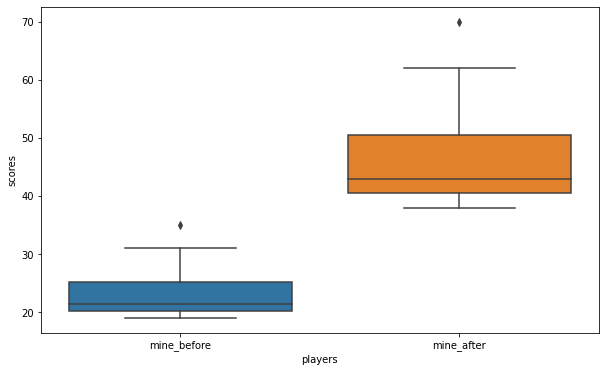

In [4]:
#Create a boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="players", y="scores", data=group_df)
ax

## Summary Statistics

In [5]:
stats = group_df.groupby('players')['scores'].agg(['count', 'std', 'mean'])
stats

,count,std,mean
players,,,
mine_after,10,10.793002,47.4
mine_before,10,5.396501,23.7


## Two Samples T Computation

In [6]:
# ‘two-sided’: the means of the distributions underlying the samples are unequal.

In [7]:
import scipy.stats as stats
stats.wilcoxon(df['mine_before'], df['mine_after'], zero_method='wilcox', correction=False, alternative='two-sided')

WilcoxonResult(statistic=0.0, pvalue=0.001953125)

In [8]:
# ‘less’: the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample.

In [9]:
import scipy.stats as stats
stats.wilcoxon(df['mine_before'], df['mine_after'], zero_method='wilcox', correction=False, alternative='less')

WilcoxonResult(statistic=0.0, pvalue=0.0009765625)

In [10]:
# ‘greater’: the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.

In [11]:
import scipy.stats as stats
stats.wilcoxon(df['mine_before'], df['mine_after'], zero_method='wilcox', correction=False, alternative='greater')

WilcoxonResult(statistic=0.0, pvalue=1.0)

## Report

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mine_before vs. mine_after: Custom statistical test, P_val:1.953e-03


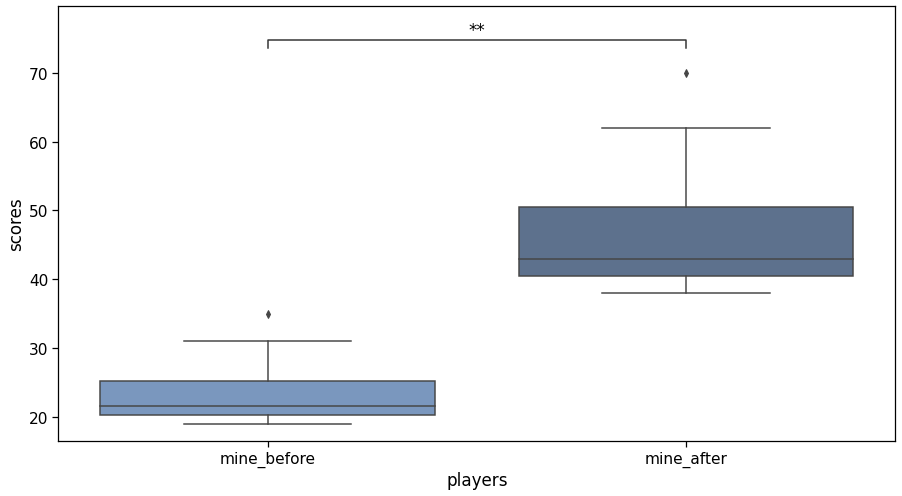

In [12]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest

pvalues = [0.001953125]

subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
plotting_parameters = {
    'data':    group_df,
    'x':       'players',
    'y':       'scores',
    'palette': subcat_palette[1:]
}

pairs = [('mine_before', 'mine_after')]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues]
with sns.plotting_context('notebook', font_scale = 1.4):
    
    from matplotlib import pyplot as plt
    plt.figure(figsize=(15,8))
    # Plot with seaborn
    ax = sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

    plt.show()